In [5]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting graphs
import numpy as np  # For numerical operations

# Load the dataset into a DataFrame
df = pd.read_csv('Social_Network_Ads.csv')

# Select the feature columns (Age and EstimatedSalary) using iloc
# iloc is used for integer-location based indexing
# df.iloc[:, 2:4] selects all rows and columns 2 to 3 (4 is exclusive)
X = df.iloc[:, 2:4]

# Select the target column (Purchased) using iloc
# df.iloc[:, 4] selects all rows and the 4th column
y = df.iloc[:, 4]

# Display the first few rows of the DataFrame to verify the data
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
# Import necessary libraries for model training and preprocessing
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from sklearn.preprocessing import StandardScaler  # For feature scaling

# Split the dataset into training and testing sets
# train_test_split splits arrays or matrices into random train and test subsets
# test_size=0.25 means 25% of the data will be used for testing, and 75% for training
# random_state=0 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Initialize the StandardScaler
# StandardScaler standardizes features by removing the mean and scaling to unit variance
sc = StandardScaler()

# Fit the scaler to the training data and transform it
# fit_transform computes the mean and std to be used for later scaling and then transforms the data
X_train = sc.fit_transform(X_train)

# Transform the test data using the same scaler
# transform performs standardization using the mean and std previously computed on the training set
X_test = sc.transform(X_test)

# Import the Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes classifier
# GaussianNB is a variant of Naive Bayes that assumes the likelihood of the features is Gaussian
clf = GaussianNB()

# Fit the classifier to the training data
# fit trains the model using the training data
clf.fit(X_train, y_train)


GaussianNB()

C:\Users\men_l\AppData\Local\Temp\ipykernel_38380\48994305.py:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


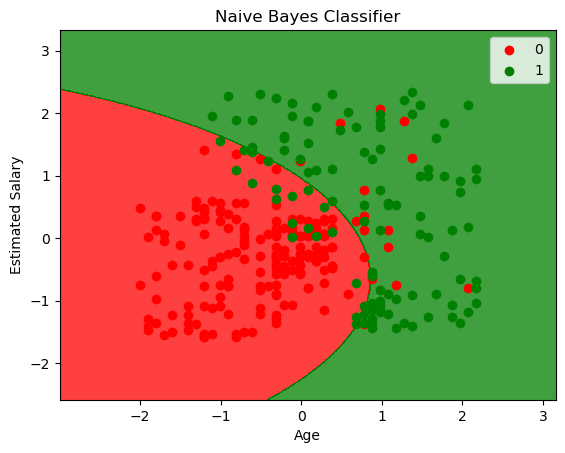

In [8]:
# Import necessary libraries for plotting and numerical operations
from matplotlib.colors import ListedColormap

# Assign training data to variables for easier reference
X_set, y_set = X_train, y_train

# Create a mesh grid for plotting decision boundaries
# np.meshgrid generates a coordinate grid from the given ranges
# np.arange creates an array of values from start to stop with a given step
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Predict the class for each point in the mesh grid
# ravel flattens the arrays, and np.array combines them into a 2D array
# clf.predict predicts the class for each point
# reshape reshapes the predictions to match the shape of X1 for plotting
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))

# Plot the training points
# np.unique finds the unique classes in y_set
# enumerate provides an index and value for each unique class
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

# Set the limits for the x and y axes
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Add titles and labels to the plot
plt.title('Naive Bayes Classifier')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()  # Add a legend to the plot
plt.show()  # Display the plot


In [10]:
# Import necessary libraries for evaluation
from sklearn.metrics import confusion_matrix

# Predict the class labels for the test set
# clf.predict uses the trained classifier to predict labels for X_test
y_pred = clf.predict(X_test)

# Compute the confusion matrix to evaluate the accuracy of the classification
# confusion_matrix compares the true labels (y_test) with the predicted labels (y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)


[[65  3]
 [ 7 25]]
